In [1]:
from skyfield.api import load, wgs84, EarthSatellite, Topos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skyfield.sgp4lib as sgp4lib
from sgp4.api import Satrec
from skyfield.sgp4lib import TEME
from skyfield.positionlib import build_position


In [2]:
line1 = '1 00005U 58002B   00179.78495062  .00000023  00000-0  28098-4 0  4753'
line2 = '2 00005  34.2682 348.7242 1859667 331.7664  19.3264 10.82419157413667'


In [3]:
# position and velocity of the satellite in the TEME frame
satellite = Satrec.twoline2rv(line1, line2)
jd,frac = 2451723, 0.2856934904
e,p,v = satellite.sgp4(jd,frac)
print(p)
print(v)

(7128.31051878939, -986.0906525747403, 290.8225351669469)
(1.404406050858927, 6.48848735009943, 4.524762859836164)


In [4]:
mdj = jd + frac - 2400000.5
print(mdj)

51722.78569349041


In [5]:
ts = load.timescale()
satellite = EarthSatellite(line1, line2, 'prova', ts)
print(satellite)
geocentric = satellite.at(satellite.epoch)  # ITRS \sim J2000
print(satellite.epoch)
print(geocentric.position.km)
print(geocentric.velocity.km_per_s)

prova catalog #5 epoch 2000-06-27 18:50:20 UTC
<Time tt=2451723.2856934904>
[ 7.02231247e+03 -1.40084931e+03 -1.10806563e-01]
[1.89461789 6.40558904 4.53491317]


In [6]:
satellites = load.tle_file('../../data/tle/TDRS-3.txt')
# satellites = load.tle_file('../data/tle/stations.txt')
print('Loaded', len(satellites), 'satellites')
ts = load.timescale()
planets = load('de421.bsp')
earth = planets['earth']


Loaded 229 satellites


In [8]:
positions = []
epochs = []
ts = load.timescale()
for satellite in satellites:
  print(satellite)
  geocentric = satellite.at(satellite.epoch)  # ITRS \sim J2000
  positions.append(geocentric.position.km)
  epochs.append(satellite.epoch)
  print(geocentric.position.km)
  print(geocentric.velocity.km_per_s)
  print(satellite.bstar)
  print()


catalog #19548 epoch 2023-01-01 08:37:50 UTC
[-42248.03123455   -399.63955856  -1860.22952838]
[ 0.06700094 -2.98245954 -0.70535098]


AttributeError: 'EarthSatellite' object has no attribute 'bstar'

In [28]:
epochs

[<Time tt=2459945.8604068607>,
 <Time tt=2459946.362641011>,
 <Time tt=2459946.362641011>,
 <Time tt=2459946.866574871>,
 <Time tt=2459947.2951648007>,
 <Time tt=2459947.7838942907>,
 <Time tt=2459947.7838942907>,
 <Time tt=2459948.8690605205>,
 <Time tt=2459948.8690605205>,
 <Time tt=2459949.383930691>,
 <Time tt=2459949.837407751>,
 <Time tt=2459950.8110174807>,
 <Time tt=2459951.311931581>,
 <Time tt=2459951.8165728003>,
 <Time tt=2459952.3160875104>,
 <Time tt=2459952.832033521>,
 <Time tt=2459952.832033521>,
 <Time tt=2459953.320225291>,
 <Time tt=2459953.910863551>,
 <Time tt=2459953.910863551>,
 <Time tt=2459954.3244594107>,
 <Time tt=2459954.826434211>,
 <Time tt=2459955.3286413806>,
 <Time tt=2459955.4964351403>,
 <Time tt=2459955.830544591>,
 <Time tt=2459956.332805671>,
 <Time tt=2459956.8793070503>,
 <Time tt=2459957.3534905002>,
 <Time tt=2459957.767212071>,
 <Time tt=2459958.7712768307>,
 <Time tt=2459959.026679561>,
 <Time tt=2459959.915969071>,
 <Time tt=2459959.9159690

In [29]:
# print(f"Satellite Name: {satellite.name}")
# print(f"Epoch Time: {satellite.epoch.utc_jpl()}")
# print(f"Epoch Time (year): {satellite.model.epochyr:.16f}")
# print(f"Epoch Time (days): {satellite.model.epochdays:.16f}")
# print(f"Epoch Time (in jd): {satellite.model.jdsatepoch:.16f}")
# print(f"Epoch Time (in jd, ut1): {satellite.epoch.ut1:.16f}")
# print(f"Epoch Time (in jd, tt): {satellite.epoch.tt:.16f}")
# #print(f"Epoch Time (in jd, gmst): {satellite.epoch.gmst:.16f}")
# print(f"Inclination: {satellite.model.inclo:.16f} rad")
# print(
#     f"Right Ascension of Ascending Node: {satellite.model.nodeo:.16f} rad")
# print(f"Eccentricity: {satellite.model.ecco:.16f}")
# print(
#     f"Argument of Periapsis: {satellite.model.argpo:.16f} rad")
# print(f"Mean Anomaly: {satellite.model.mo:.16f} rad")
# print(f"Mean Motion: {satellite.model.no_kozai/60:.16f} rad/sec")


In [30]:
print(len(positions), len(epochs))

229 229


In [31]:
s0 = satellites[0]
T0 = epochs[0].tt
time = np.array([])
error = np.array([])
for i in range(len(positions)):
    integrated_pos = s0.at(epochs[i]).position.km
    time = np.append(time, (epochs[i].tt - T0))
    er = sum((integrated_pos- positions[i])**2)**0.5
    error = np.append(error, er)

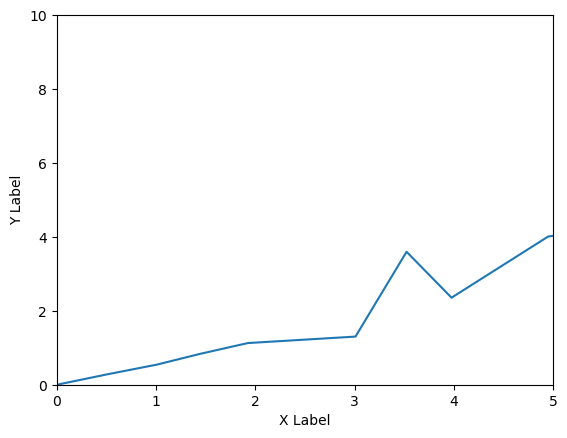

In [34]:
# ts = load.timescale()
# t = ts.tt_jd(np.arange(satellite.epoch.tt, satellite.epoch.tt + 0.06, 0.0005))

# # Compute geocentric positions for the satellite.

# g = satellite.at(t)
# valid = [m is None for m in g.message]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, error)
ax.set_ylim(0, 10)
ax.set_xlim(0, 5)
# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
# Show the plot
plt.show()


In [7]:
ts = load.timescale()
g_int = satellite.at(satellite.epoch)
# for i in range(0,1):
# # for i in range(len(satellites)):
#   t = ts.tt_jd(
#       np.arange(
#           satellites[i].epoch.tt,
#           satellites[i].epoch.tt+0.06,
#           0.001)) 
#   for time in t:
#     print(time)
#   g = satellite.at(t)

# we add the data (time, error) in a numpy array
T0 = satellites[0].epoch.tt
time = np.array([])
error = np.array([])
for satellite in satellites:
  r = satellites[0].at(satellite.epoch).position.km
  print(satellite.at(satellite.epoch).position.km)
  # print(satellite.at(satellite.epoch).position.m)
  # print(np.linalg.norm(r))
  # norm of error
  er = sum(abs(r[i] - satellite.at(satellite.epoch).position.km[i]))
  # er = np.linalg.norm(r - satellite.at(satellite.epoch).position.km)
  time = np.append(time, satellite.epoch.tt - T0)
  error = np.append(error, er)
  # print("Integrated satelite: "+ r)
  # print("TLE satelite: "+ satellite.at(T).position.m)
  # print(satellite.at(satellite.epoch).position.m)
  # error = np.linalg.norm(r - satellite.at(T).position.m)
# Compute geocentric positions for the satellite.


[6842.65922523 1065.21973044  -15.1820108 ]
[6872.56310711  851.26709244  -15.24879952]
[6907.5009385   493.11035318  -15.30847414]
[6907.5009385   493.11035318  -15.30847414]
[6917.89619785  313.45546803  -15.33192877]
[6917.89619785  313.45546803  -15.33192877]
[6925.0184233    25.57069015  -15.33464013]
[6924.99079815  -46.50681773  -15.33941131]
[6900.36042769 -585.98463944  -15.28006663]
[6869.96551436 -872.27894094  -15.19681964]
[ 6833.63302623 -1121.5685611    -15.1147489 ]
[ 6808.82414003 -1263.40590143   -15.06420208]
[ 6742.36888661 -1580.41519855   -14.90379698]
[ 6725.57178115 -1650.4571746    -14.86971929]
[ 6651.1232619  -1928.67287478   -14.69708308]
[ 6640.90750534 -1963.15866685   -14.66997002]
[ 6640.90750534 -1963.15866685   -14.66997002]
[ 6530.04430112 -2305.6002632    -14.42331572]
[ 6480.65042233 -2440.84896948   -14.31082238]
[ 6401.463394   -2642.04738435   -14.12624713]
[ 6401.463394   -2642.04738435   -14.12624713]
[ 6330.55629258 -2807.22098278   -13.965819

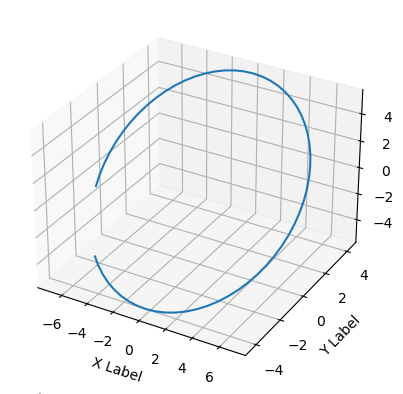

In [32]:
# Create sample data
data = g.position.m

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[0], data[1], data[2])

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [12]:
orbital_elements = satellite.at(satellite.epoch).to_icrs().frame_latlon(load.timescale())[-1]

# Convert the orbital elements to the perifocal reference frame
r_perifocal, v_perifocal = orbital_elements.to_perifocal()


AttributeError: 'Topos' object has no attribute 'perifocal'

In [8]:
ts = load.timescale()
t = ts.tt(2023, 3, 27, 4, 0)

print('TT date and time: ', t.tt_strftime())
print('TAI date and time:', t.tai_strftime())
print('UTC date and time:', t.utc_strftime())
print('TDB Julian date: {:.10f}'.format(t.tdb))
print('Julian century: {:.1f}'.format(t.J))


TT date and time:  2023-03-27 04:00:00 TT
TAI date and time: 2023-03-27 03:59:28 TAI
UTC date and time: 2023-03-27 03:58:51 UTC
TDB Julian date: 2460030.6666666856
Julian century: 2023.2


In [6]:
ts = load.timescale()
t = ts.utc(2014, 1, 23, 11, 18, 7)

geocentric = satellite.at(t)
print(geocentric.position.km)

lat, lon = wgs84.latlon_of(geocentric)
print('Latitude:', lat)
print('Longitude:', lon)
print('distance from earth center:', geocentric.distance().km, 'km')

[-1.80793098e+20  5.94625549e+19 -1.48671928e+20]
Latitude: -38deg 04' 18.9"
Longitude: -130deg 17' 20.3"
distance from earth center: 2.415062770180053e+20 km


In [7]:

print('TT date and time: ', t.tt_strftime())
print('TAI date and time:', t.tai_strftime())
print('UTC date and time:', t.utc_strftime())
print('TDB Julian date: {:.10f}'.format(t.tdb))
print('Julian century: {:.1f}'.format(t.J))


TT date and time:  2014-01-23 11:19:14 TT
TAI date and time: 2014-01-23 11:18:42 TAI
UTC date and time: 2014-01-23 11:18:07 UTC
TDB Julian date: 2456680.9716919512
Julian century: 2014.1
